In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from typing import List, Dict, Tuple

In [2]:
# Load data
df = pd.read_csv("data/heart_2020_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [3]:
# Preprocessing data

categorical_features = [
    "Smoking",
    "AlcoholDrinking",
    "Stroke",
    "DiffWalking",
    "Sex",
    "AgeCategory",
    "Race",
    "Diabetic",
    "PhysicalActivity",
    "GenHealth",
    "Asthma",
    "KidneyDisease",
    "SkinCancer"
]

continuos_features = [
    "BMI",
    "PhysicalHealth",
    "MentalHealth"
]

target_variable = "HeartDisease"

def data_preprocessing(data: pd.DataFrame, categorical_features: List[str], continuous_features: List[str], target_variable: str):

    df = data.copy()

    # protected variables
    sex = df["Sex"].values
    age = df["AgeCategory"].values
    race = df["Race"].values

    # target
    target = df[target_variable].values

    df_processed = df[categorical_features + continuous_features]
    df_processed = pd.get_dummies(df_processed, prefix=None, prefix_sep='_', dummy_na=False, columns=categorical_features, drop_first=False)

    return df_processed, df, target, sex, age, race

df_processed, df_original, target, sex, age, race = data_preprocessing(df, categorical_features=categorical_features, continuous_features=continuos_features, target_variable=target_variable)

In [4]:
# Split in train and test
X_train, X_test, y_train, y_test, sex_train, sex_test, age_train, age_test, race_train, race_test = train_test_split(
    df_processed, target, sex, age, race, test_size=0.2, random_state=42)

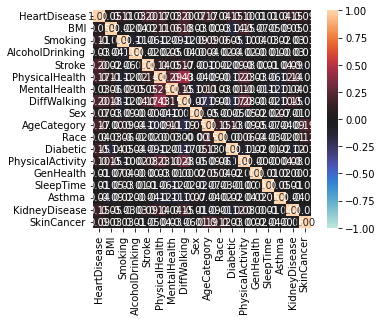

{'corr':                   HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
 HeartDisease          1.000000  0.051803  0.107764         0.032080  0.196835   
 BMI                   0.051803  1.000000 -0.023118        -0.038816  0.019733   
 Smoking               0.107764 -0.023118  1.000000        -0.111768 -0.061226   
 AlcoholDrinking       0.032080 -0.038816 -0.111768         1.000000 -0.019858   
 Stroke                0.196835  0.019733 -0.061226        -0.019858  1.000000   
 PhysicalHealth        0.170721  0.109788 -0.115352        -0.017254  0.137014   
 MentalHealth          0.028591  0.064131 -0.085157         0.051282  0.046467   
 DiffWalking           0.201258  0.181678 -0.120074        -0.035328  0.174143   
 Sex                   0.070040  0.026940 -0.085052         0.004200 -0.003091   
 AgeCategory           0.168821 -0.001601  0.088392         0.043423 -0.103131   
 Race                  0.039285  0.030883  0.061821        -0.021080 -0.016025   
 Diabeti

In [5]:
plt.rcParams["figure.figsize"] = (10,10)

# Checking for correlation between variables
from dython import nominal

data_test = df_original.copy()

# Encode the object as an enumerated type or categorical variable.
data_test[categorical_features] = data_test[categorical_features].apply(lambda x : pd.factorize(x)[0])
nominal.associations(data_test)

In [6]:
# Train whitebox model

# Scale continuous variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
scaler = ColumnTransformer([('scaler', StandardScaler(), continuos_features)], remainder='passthrough')

# Whitebox model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

whitebox_model = Pipeline(steps=[('scaler', scaler), ('clf', DecisionTreeClassifier(min_samples_split = 0.01, min_samples_leaf= 0.01, max_features="auto", max_depth = 5, criterion = "gini", random_state = 42))])
# whitebox_model = Pipeline(steps=[('scaler', scaler), ('clf', DecisionTreeClassifier(random_state = 42))])

whitebox_model.fit(X_train, y_train)
y_pred_whitebox = whitebox_model.predict(X_test)
y_pred_proba_whitebox = whitebox_model.predict_proba(X_test)

print(classification_report(y_test, y_pred_whitebox))

# plot tree
plt.figure(figsize=(25,20))  # set plot size (denoted in inches)
tree.plot_tree(whitebox_model['clf'], fontsize=9, feature_names=df_processed.columns)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'n_jobs'